<a href="https://colab.research.google.com/github/jacobiancosine/jacobiancosine/blob/main/Capstone_2023_rev_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data File. Initial EDA

In [96]:
#loading up everything that is needed.
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
#import seaborn as sns
from collections import Counter


In [25]:
#access personal drive for data.
#uncommit next two lines when working in collab

#from google.colab import drive
#drive.mount('/content/drive')

In [26]:
#turn csv into dataframe
#games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/games.csv')

#local file
games = pd.read_csv('games.csv')

In [27]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# EDA

In [28]:
games.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.356000e+04,83560.000000,83560.000000,83560.000000,83560.000000,83560.000000,83560.000000,8.356000e+04,83560.000000,44.000000,83560.000000,8.356000e+04,83560.000000,83560.000000,83560.000000,83560.000000
mean,1.334063e+06,136.255086,0.316563,7.195325,0.551795,3.408270,0.040558,9.760502e+02,162.522367,98.909091,20.083772,7.894248e+02,106.641204,10.854931,95.016599,11.656498
std,6.814413e+05,5450.777515,2.267967,12.312332,13.846870,15.551867,1.807466,2.458273e+04,4616.325460,0.857747,172.998788,1.805742e+04,1152.854945,190.540115,1524.560676,207.227074
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.630450e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.304165e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.886992e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.700000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.719700e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [29]:
#check for duplicated
games.duplicated().sum()

0

In [30]:
#info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83560 entries, 0 to 83559
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       83560 non-null  int64  
 1   Name                        83554 non-null  object 
 2   Release date                83560 non-null  object 
 3   Estimated owners            83560 non-null  object 
 4   Peak CCU                    83560 non-null  int64  
 5   Required age                83560 non-null  int64  
 6   Price                       83560 non-null  float64
 7   DLC count                   83560 non-null  int64  
 8   About the game              80123 non-null  object 
 9   Supported languages         83560 non-null  object 
 10  Full audio languages        83560 non-null  object 
 11  Reviews                     9716 non-null   object 
 12  Header image                83560 non-null  object 
 13  Website                     390

In [31]:
games.isnull().sum().sort_values()

AppID                             0
Median playtime two weeks         0
Median playtime forever           0
Average playtime two weeks        0
Average playtime forever          0
Recommendations                   0
Achievements                      0
Negative                          0
Positive                          0
User score                        0
Linux                             0
Mac                               0
Windows                           0
Metacritic score                  0
Required age                      0
Header image                      0
Full audio languages              0
Supported languages               0
DLC count                         0
Price                             0
Release date                      0
Peak CCU                          0
Estimated owners                  0
Name                              6
Screenshots                    1926
Genres                         3425
About the game                 3437
Developers                  

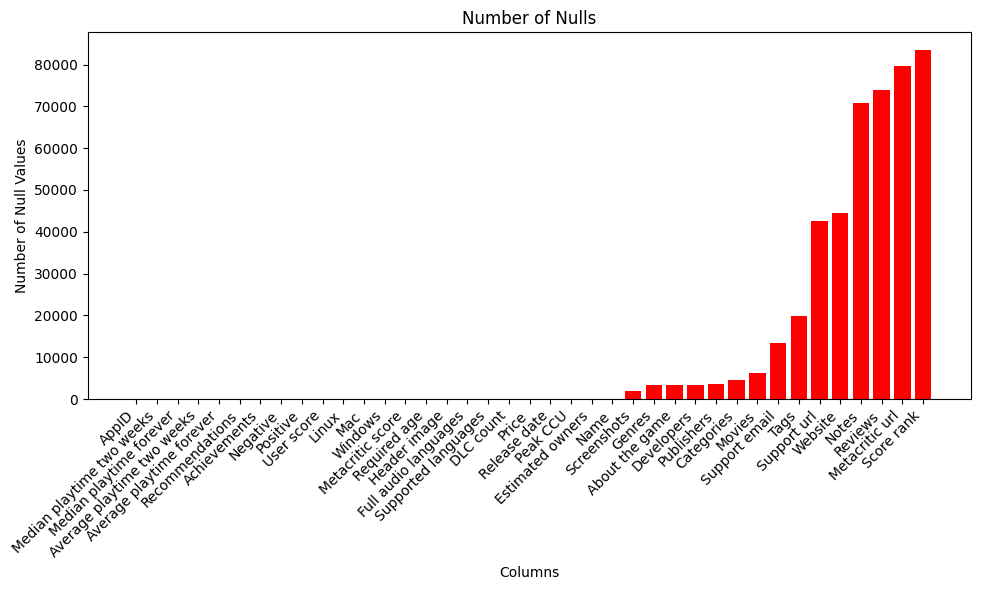

In [32]:
#display nulls as a graph

null_counts = games.isnull().sum().sort_values() # sort values in ascending order


plt.figure(figsize=(10,6))
plt.bar(null_counts.index, null_counts.values, color = 'red')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Nulls')
plt.xticks(rotation = 45, ha= 'right') #angles the columns labels for better readability
plt.tight_layout()
plt.show()

**Columns to keep for sure even though we have some nulls:**

*   Genres
*   Developers
*   Publishers
*   Tags

**Columns to review for dropping:**

*   Screenshots
*   About the Game
*   Movies
*   Support Emails
*   Support url
*   Website
*   Notes
*   Review
*   Metacritic url
*   Scorerank




In [33]:
#let's look at the nulls a little be closer

null_threshold = 6

columns_nulls = games.columns[games.isnull().sum() > null_threshold].tolist()

#need to be careful. It looks like 'Genre', 'Categories' and 'Tags' are needed.

In [34]:
columns_nulls

['About the game',
 'Reviews',
 'Website',
 'Support url',
 'Support email',
 'Metacritic url',
 'Score rank',
 'Notes',
 'Developers',
 'Publishers',
 'Categories',
 'Genres',
 'Tags',
 'Screenshots',
 'Movies']

In [35]:
# can drop. Might be interesting to do an analysis on this word bubble in a different analysis
games['About the game'].unique

<bound method Series.unique of 0        Galactic Bowling is an exaggerated and stylize...
1        THE LAW!! Looks to be a showdown atop a train....
2        Jolt Project: The army now has a new robotics ...
3        HENOSIS™ is a mysterious 2D Platform Puzzler w...
4        ABOUT THE GAME Play as a hacker who has arrang...
                               ...                        
83555    ABOUT THE GAME A sex simulation game with visu...
83556    Are you ready to find the difference? Then qui...
83557    UNDRESS! - is an exciting game in which the pl...
83558    Story: The world is shrouded with the eclipse ...
83559    'Hentai Abigail' is a unique puzzle in which t...
Name: About the game, Length: 83560, dtype: object>

In [36]:
# can drop
games['Screenshots'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              5
https://cdn.akamai.steamstatic.com/steam/apps/359550/ss_79af6b4e7ea15b74

In [37]:
#split dataframe
games_with_nulls = games[columns_nulls]
games_without_nulls = games.drop(columns=columns_nulls)

In [38]:
games_without_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83560 entries, 0 to 83559
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       83560 non-null  int64  
 1   Name                        83554 non-null  object 
 2   Release date                83560 non-null  object 
 3   Estimated owners            83560 non-null  object 
 4   Peak CCU                    83560 non-null  int64  
 5   Required age                83560 non-null  int64  
 6   Price                       83560 non-null  float64
 7   DLC count                   83560 non-null  int64  
 8   Supported languages         83560 non-null  object 
 9   Full audio languages        83560 non-null  object 
 10  Header image                83560 non-null  object 
 11  Windows                     83560 non-null  bool   
 12  Mac                         83560 non-null  bool   
 13  Linux                       835

In [39]:
games_with_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83560 entries, 0 to 83559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   About the game  80123 non-null  object 
 1   Reviews         9716 non-null   object 
 2   Website         39054 non-null  object 
 3   Support url     41016 non-null  object 
 4   Support email   70241 non-null  object 
 5   Metacritic url  3910 non-null   object 
 6   Score rank      44 non-null     float64
 7   Notes           12715 non-null  object 
 8   Developers      80103 non-null  object 
 9   Publishers      79855 non-null  object 
 10  Categories      79104 non-null  object 
 11  Genres          80135 non-null  object 
 12  Tags            63574 non-null  object 
 13  Screenshots     81634 non-null  object 
 14  Movies          77260 non-null  object 
dtypes: float64(1), object(14)
memory usage: 9.6+ MB


#  Review columns to see which I really don't need.

In [40]:
# can drop
games['Support email'].value_counts()

info@bigfishgames.com                            325
mikhail.zverev@8floor.net                        271
business@atomicfabrik.com                        199
contact@exosyphenstudios.com                     178
support@bigfishgames.zendesk.com                 164
                                                ... 
crackedegghelp@gmail.com                           1
hey@rocketmonstergames.com                         1
support-breacharchangel-steam@hostedgames.org      1
chris@ooblies.com                                  1
casualrae@gmail.com                                1
Name: Support email, Length: 41334, dtype: int64

In [41]:
# can drop
games['Score rank'].value_counts()

99.0     18
98.0     12
100.0    12
97.0      2
Name: Score rank, dtype: int64

In [42]:
# can drop
games['Notes'].value_counts()

Nakedness. All characters appearing in this game are over 18 years of age.                                                                                      117
This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content    113
-Nudity or sexual content -Not suitable for watching at work -Not suitable for all ages -All characters in the game are over 18 years old                        57
This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Nudity or Sexual Content, General Mature Content      43
This game contains the following sexual content ・Strong language ・Sexual language                                                                                39
                                                                                                                                                               ... 
This game does i

**Columns to be dropped will be the following:**

* 'About the game'
* 'Reviews'
* 'Website'
* 'Support url'
* 'Support email'
* 'Metacritic url'
* 'Score rank'
* 'Notes'
* 'Screenshots'
* 'Movies'

These columns are mostly text and will not apply to the analysis to be done.




In [43]:
#columns that would be need to be dropped.
drop_me =  ['About the game', 'Reviews', 'Website', 'Support url', 'Support email', 'Metacritic url', 'Score rank', 'Notes', 'Screenshots', 'Movies']

In [44]:
#dropping unneccessary columns
games = games.drop(columns = drop_me)

In [45]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83560 entries, 0 to 83559
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       83560 non-null  int64  
 1   Name                        83554 non-null  object 
 2   Release date                83560 non-null  object 
 3   Estimated owners            83560 non-null  object 
 4   Peak CCU                    83560 non-null  int64  
 5   Required age                83560 non-null  int64  
 6   Price                       83560 non-null  float64
 7   DLC count                   83560 non-null  int64  
 8   Supported languages         83560 non-null  object 
 9   Full audio languages        83560 non-null  object 
 10  Header image                83560 non-null  object 
 11  Windows                     83560 non-null  bool   
 12  Mac                         83560 non-null  bool   
 13  Linux                       835

In [46]:
# can drop
games['Header image'].value_counts()

https://cdn.akamai.steamstatic.com/steam/apps/750920/header.jpg?t=1644931091     20
https://cdn.akamai.steamstatic.com/steam/apps/359550/header.jpg?t=1655223333      5
https://cdn.akamai.steamstatic.com/steam/apps/24010/header.jpg?t=1658409119       5
https://cdn.akamai.steamstatic.com/steam/apps/2195250/header.jpg?t=1701266064     4
https://cdn.akamai.steamstatic.com/steam/apps/37960/header.jpg?t=1447352428       4
                                                                                 ..
https://cdn.akamai.steamstatic.com/steam/apps/326730/header.jpg?t=1657789925      1
https://cdn.akamai.steamstatic.com/steam/apps/555040/header.jpg?t=1479077669      1
https://cdn.akamai.steamstatic.com/steam/apps/1007810/header.jpg?t=1656914140     1
https://cdn.akamai.steamstatic.com/steam/apps/363330/header.jpg?t=1580998485      1
https://cdn.akamai.steamstatic.com/steam/apps/2530730/header.jpg?t=1691744164     1
Name: Header image, Length: 83451, dtype: int64

In [47]:
# can drop
games['Full audio languages'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [48]:
# can drop
games['DLC count'].value_counts()

0      71798
1       7540
2       1871
3        713
4        392
       ...  
579        1
87         1
190        1
149        1
90         1
Name: DLC count, Length: 95, dtype: int64

In [49]:
#can drop? keep
games['Achievements'].value_counts()

0       42351
10       2084
12       1634
20       1473
6        1383
        ...  
211         1
394         1
1552        1
4981        1
238         1
Name: Achievements, Length: 431, dtype: int64

In [50]:
#can drop
games['Recommendations'].value_counts()

0         69837
116          69
106          65
101          60
105          60
          ...  
130347        1
4436          1
5822          1
1232          1
6040          1
Name: Recommendations, Length: 4034, dtype: int64

In [51]:
#dropping additional columns
#12-6-2023 droppign the playtime. These metric are recorded after the fact a game is bought already.

drop_me_too =['Header image','Full audio languages','Supported languages','Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks' ]

In [52]:
#dropping unneccessary columns part two
games = games.drop(columns = drop_me_too)

In [53]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,User score,Positive,Negative,Achievements,Recommendations,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,0,6,11,30,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,0,53,5,12,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,True,False,...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,0,3,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,0,50,8,17,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [54]:
games.shape

(83560, 22)

In [55]:
#getting rid of nulls
games.dropna(inplace = True)

In [56]:
games.shape

(62321, 22)

In [57]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62321 entries, 0 to 83556
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             62321 non-null  int64  
 1   Name              62321 non-null  object 
 2   Release date      62321 non-null  object 
 3   Estimated owners  62321 non-null  object 
 4   Peak CCU          62321 non-null  int64  
 5   Required age      62321 non-null  int64  
 6   Price             62321 non-null  float64
 7   DLC count         62321 non-null  int64  
 8   Windows           62321 non-null  bool   
 9   Mac               62321 non-null  bool   
 10  Linux             62321 non-null  bool   
 11  Metacritic score  62321 non-null  int64  
 12  User score        62321 non-null  int64  
 13  Positive          62321 non-null  int64  
 14  Negative          62321 non-null  int64  
 15  Achievements      62321 non-null  int64  
 16  Recommendations   62321 non-null  int64 

# Dealing with genres

In [58]:
games['Tags'].head()

0                          Indie,Casual,Sports,Bowling
1    Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...
3    2D Platformer,Atmospheric,Surreal,Mystery,Puzz...
4    Indie,Adventure,Nudity,Violent,Sexual Content,...
5    Turn-Based Combat,Massively Multiplayer,Multip...
Name: Tags, dtype: object

In [59]:
#check for nulls
games['Genres'].isnull().sum()

0

In [60]:
games['Categories'].nunique()

5260

In [61]:
games['Categories'].value_counts().head(500)

Single-player                                                                                                                                                     16537
Single-player,Steam Achievements                                                                                                                                   6358
Single-player,Steam Achievements,Steam Cloud                                                                                                                       2467
Single-player,Partial Controller Support                                                                                                                           2104
Single-player,Full controller support                                                                                                                              1786
                                                                                                                                                                

In [62]:
#spliting tool --not needed?
def string_split(column):
  list_genre = column.split(",")
  return list_genre

# code to break down Genres, Tags and Categories

In [63]:
genre_count = {}
#check for nullss
for genre in games['Genres']:
  if isinstance(genre, str):
    genres = genre.split(",")
    for genre in genres:
      genre_count[genre] =genre_count.get(genre, 0) + 1

In [64]:
genre_count

{'Casual': 25019,
 'Indie': 45042,
 'Sports': 2990,
 'Action': 27110,
 'Adventure': 24816,
 'Free to Play': 3473,
 'Massively Multiplayer': 1575,
 'RPG': 11142,
 'Strategy': 12483,
 'Simulation': 12441,
 'Early Access': 7611,
 'Racing': 2437,
 'Sexual Content': 105,
 'Nudity': 116,
 'Violent': 512,
 'Gore': 304,
 'Animation & Modeling': 125,
 'Design & Illustration': 146,
 'Utilities': 247,
 'Game Development': 62,
 'Web Publishing': 38,
 'Audio Production': 60,
 'Video Production': 68,
 'Education': 97,
 'Software Training': 52,
 'Accounting': 7,
 'Photo Editing': 29,
 'Movie': 2,
 'Documentary': 1,
 'Episodic': 1,
 'Short': 1,
 'Tutorial': 1,
 '360 Video': 1}

## Looking at Genre I'm going to remove everything that doesn't specifically describe a genre.


### removing the following:
* 'Sexual Content': 105,
* 'Nudity': 116,
* 'Violent': 512,
* 'Gore': 304,
* 'Animation & Modeling': 125,
* 'Design & Illustration': 146,
* 'Utilities': 247,
* 'Game Development': 62,
* 'Web Publishing': 38,
* 'Audio Production': 60,
* 'Video Production': 68,
* 'Education': 97,
* 'Software Training': 52,
* 'Accounting': 7,
* 'Photo Editing': 29,
* 'Movie': 2,
* 'Documentary': 1,
* 'Episodic': 1,
* 'Short': 1,
* 'Tutorial': 1,
* '360 Video': 1}

# Expirement to check for values in genre

In [65]:
values_to_check = ['360 Video', 'Tutorials']


In [66]:
values_to_remove = ['Sexual Content', 'Nudity','Violent','Gore', 'Animation & Modeling','Design & Illustration' , 'Utilities', 'Game Development', 'Web Publishing', 'Audio Production', 'Video Production', 'Education', 'Software Training', 'Accounting', 'Photo Editing', 'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video']

In [67]:
#code to remove genres that I don't need
values_to_check = ['360 Video', 'Tutorials']

values_to_remove = ['Sexual Content', 'Nudity','Violent','Gore', 'Animation & Modeling','Design & Illustration' , 'Utilities', 'Game Development', 'Web Publishing', 'Audio Production', 'Video Production', 'Education', 'Software Training', 'Accounting', 'Photo Editing', 'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video']

In [68]:
#code to check for values in games_test3
games['Remove'] = games['Genres'].apply(lambda x: any([k in x for k in values_to_remove]))

In [69]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Positive,Negative,Achievements,Recommendations,Developers,Publishers,Categories,Genres,Tags,Remove
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,6,11,30,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",False
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,53,5,12,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",False
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,3,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",False
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,50,8,17,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",False
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,True,False,...,87,49,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",False


In [70]:
#code to remove base on true or false and moving to a new df
games_test_clean_genre = games[games['Remove'] == False]

In [71]:
genre_count2 = {}

#breakdown of Genres for games_test3

for genre in games_test_clean_genre['Genres']:
      genres = genre.split(",")
      for genre in genres:
        genre_count2[genre] = genre_count2.get(genre, 0) + 1


In [72]:
# what is left after
genre_count2

{'Casual': 24795,
 'Indie': 44496,
 'Sports': 2973,
 'Action': 26693,
 'Adventure': 24486,
 'Free to Play': 3421,
 'Massively Multiplayer': 1551,
 'RPG': 11024,
 'Strategy': 12396,
 'Simulation': 12293,
 'Early Access': 7419,
 'Racing': 2423}

In [73]:
genre_count2.keys()

dict_keys(['Casual', 'Indie', 'Sports', 'Action', 'Adventure', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Strategy', 'Simulation', 'Early Access', 'Racing'])


These will be added as a column each with temp value of true false, later to be converted to into 1 and zero.

In [74]:
#sample df to test new function
games_test = games_test_clean_genre.copy()

# Function for adding columns

In [75]:
def add_columns(dataframe, column_names):
      for col_name in column_names:
        dataframe[col_name] = 0
      return dataframe

In [76]:
#using the diction key to get the column to be added.
columns_to_add = list(genre_count2.keys())

In [77]:
#genres
columns_to_add

['Casual',
 'Indie',
 'Sports',
 'Action',
 'Adventure',
 'Free to Play',
 'Massively Multiplayer',
 'RPG',
 'Strategy',
 'Simulation',
 'Early Access',
 'Racing']

In [78]:
output = add_columns(games_test, columns_to_add)

 # End function for adding

In [79]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61286 entries, 0 to 83556
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AppID                  61286 non-null  int64  
 1   Name                   61286 non-null  object 
 2   Release date           61286 non-null  object 
 3   Estimated owners       61286 non-null  object 
 4   Peak CCU               61286 non-null  int64  
 5   Required age           61286 non-null  int64  
 6   Price                  61286 non-null  float64
 7   DLC count              61286 non-null  int64  
 8   Windows                61286 non-null  bool   
 9   Mac                    61286 non-null  bool   
 10  Linux                  61286 non-null  bool   
 11  Metacritic score       61286 non-null  int64  
 12  User score             61286 non-null  int64  
 13  Positive               61286 non-null  int64  
 14  Negative               61286 non-null  int64  
 15  Ac

# Tags review

In [80]:
tag_count2 = {}

#breakdown of Genres for games_test_clean_genre


for genre in games_test_clean_genre['Tags']:
      genres = genre.split(",")
      for genre in genres:
        tag_count2[genre] = tag_count2.get(genre, 0) + 1

In [81]:
tag_count2

{'Indie': 39109,
 'Casual': 26830,
 'Sports': 3174,
 'Bowling': 37,
 'Action': 27943,
 'Pixel Graphics': 9008,
 '2D': 17185,
 'Retro': 6299,
 'Arcade': 7609,
 'Score Attack': 1853,
 'Minimalist': 3691,
 'Comedy': 4082,
 'Singleplayer': 32468,
 'Fast-Paced': 1614,
 'Funny': 6602,
 'Parody': 429,
 'Difficult': 5171,
 'Gore': 3151,
 'Violent': 3532,
 'Western': 254,
 'Controller': 4079,
 'Blood': 412,
 '2D Platformer': 3868,
 'Atmospheric': 10967,
 'Surreal': 1711,
 'Mystery': 3685,
 'Puzzle': 11223,
 'Survival': 4624,
 'Adventure': 26197,
 'Linear': 3395,
 'Experimental': 1095,
 'Platformer': 6271,
 'Precision Platformer': 1365,
 'Puzzle-Platformer': 2760,
 'Stylized': 4138,
 'Physics': 3683,
 'Time Manipulation': 408,
 'Nudity': 2492,
 'Sexual Content': 2575,
 'Story Rich': 8842,
 'Turn-Based Combat': 2136,
 'Massively Multiplayer': 1592,
 'Multiplayer': 7704,
 'RPG': 11701,
 'Tactical RPG': 920,
 'Exploration': 7740,
 'PvP': 3266,
 'MMORPG': 412,
 'Turn-Based Strategy': 2366,
 'God Gam

# Categories

In [82]:
cate_count2 = {}

#breakdown of Genres for games_test3

for genre in games_test_clean_genre['Categories']:
      genres = genre.split(",")
      for genre in genres:
        cate_count2[genre] = cate_count2.get(genre, 0) + 1

In [83]:
cate_count2

{'Single-player': 58728,
 'Multi-player': 12560,
 'Steam Achievements': 30780,
 'Partial Controller Support': 8628,
 'Full controller support': 13630,
 'Steam Leaderboards': 5912,
 'Remote Play on Phone': 757,
 'Remote Play on Tablet': 913,
 'Remote Play on TV': 2056,
 'MMO': 840,
 'PvP': 7686,
 'Online PvP': 5443,
 'Co-op': 6326,
 'Online Co-op': 3437,
 'In-App Purchases': 1397,
 'Steam Cloud': 16295,
 'Steam Trading Cards': 9466,
 'Shared/Split Screen': 4792,
 'Cross-Platform Multiplayer': 1879,
 'Remote Play Together': 5301,
 'Stats': 3139,
 'Shared/Split Screen PvP': 3409,
 'Captions available': 1078,
 'Steam Workshop': 1640,
 'Includes level editor': 1700,
 'LAN PvP': 533,
 'LAN Co-op': 476,
 'Shared/Split Screen Co-op': 2754,
 'Steam Turn Notifications': 84,
 'VR Support': 230,
 'SteamVR Collectibles': 39,
 'Valve Anti-Cheat enabled': 124,
 'Includes Source SDK': 46,
 'Commentary available': 210,
 'Mods': 2,
 'Mods (require HL2)': 1,
 'Tracked Controller Support': 160,
 'VR Only'

# breaking down data to top hitters

# Code to plot dictionaries Values

In [115]:
#sorting dictionary
def sort_dict(dictionary):

    #sort diction asceding
    sorted_dict = sorted(dictionary.items(), key=lambda x:x[1])
    converted_dict = dict(sorted_dict)

    count_dict = Counter(dict(sorted_dict))
    updated_dict = dict(count_dict.most_common(50)) #changed to 50 to sort one thing
    return count_dict

In [98]:
test = sort_dict(tag_count2)

# Code to merge cate and tags

In [107]:
top25_cate = sort_dict(cate_count2)
top25_cate.most_common(25)

[('Single-player', 58728),
 ('Steam Achievements', 30780),
 ('Steam Cloud', 16295),
 ('Full controller support', 13630),
 ('Multi-player', 12560),
 ('Steam Trading Cards', 9466),
 ('Partial Controller Support', 8628),
 ('PvP', 7686),
 ('Co-op', 6326),
 ('Steam Leaderboards', 5912),
 ('Online PvP', 5443),
 ('Remote Play Together', 5301),
 ('Shared/Split Screen', 4792),
 ('Online Co-op', 3437),
 ('Shared/Split Screen PvP', 3409),
 ('Stats', 3139),
 ('Shared/Split Screen Co-op', 2754),
 ('Remote Play on TV', 2056),
 ('Cross-Platform Multiplayer', 1879),
 ('Includes level editor', 1700),
 ('Steam Workshop', 1640),
 ('In-App Purchases', 1397),
 ('Captions available', 1078),
 ('Remote Play on Tablet', 913),
 ('MMO', 840)]

In [106]:
test.most_common(25)

[('Indie', 39109),
 ('Singleplayer', 32468),
 ('Action', 27943),
 ('Casual', 26830),
 ('Adventure', 26197),
 ('2D', 17185),
 ('Strategy', 13364),
 ('Simulation', 13035),
 ('RPG', 11701),
 ('Puzzle', 11223),
 ('Atmospheric', 10967),
 ('3D', 9733),
 ('Pixel Graphics', 9008),
 ('Early Access', 8885),
 ('Story Rich', 8842),
 ('Colorful', 8713),
 ('Cute', 7895),
 ('Exploration', 7740),
 ('Multiplayer', 7704),
 ('Arcade', 7609),
 ('First-Person', 7486),
 ('Fantasy', 7451),
 ('Funny', 6602),
 ('Shooter', 6489),
 ('Retro', 6299)]

In [108]:
#converting top 25 category and tags to prep for merging
top25_tags = list(test.most_common(25))
top24_cat = list(top25_cate.most_common(25))

In [109]:
cat_tags = list(set(top24_cat + top25_tags))

In [114]:
cat_tags = dict(cat_tags)

In [117]:
cat_tags = sort_dict(cat_tags)

In [119]:
cat_tags.most_common()

[('Single-player', 58728),
 ('Indie', 39109),
 ('Singleplayer', 32468),
 ('Steam Achievements', 30780),
 ('Action', 27943),
 ('Casual', 26830),
 ('Adventure', 26197),
 ('2D', 17185),
 ('Steam Cloud', 16295),
 ('Full controller support', 13630),
 ('Strategy', 13364),
 ('Simulation', 13035),
 ('Multi-player', 12560),
 ('RPG', 11701),
 ('Puzzle', 11223),
 ('Atmospheric', 10967),
 ('3D', 9733),
 ('Steam Trading Cards', 9466),
 ('Pixel Graphics', 9008),
 ('Early Access', 8885),
 ('Story Rich', 8842),
 ('Colorful', 8713),
 ('Partial Controller Support', 8628),
 ('Cute', 7895),
 ('Exploration', 7740),
 ('Multiplayer', 7704),
 ('PvP', 7686),
 ('Arcade', 7609),
 ('First-Person', 7486),
 ('Fantasy', 7451),
 ('Funny', 6602),
 ('Shooter', 6489),
 ('Co-op', 6326),
 ('Retro', 6299),
 ('Steam Leaderboards', 5912),
 ('Online PvP', 5443),
 ('Remote Play Together', 5301),
 ('Shared/Split Screen', 4792),
 ('Online Co-op', 3437),
 ('Shared/Split Screen PvP', 3409),
 ('Stats', 3139),
 ('Shared/Split Screen

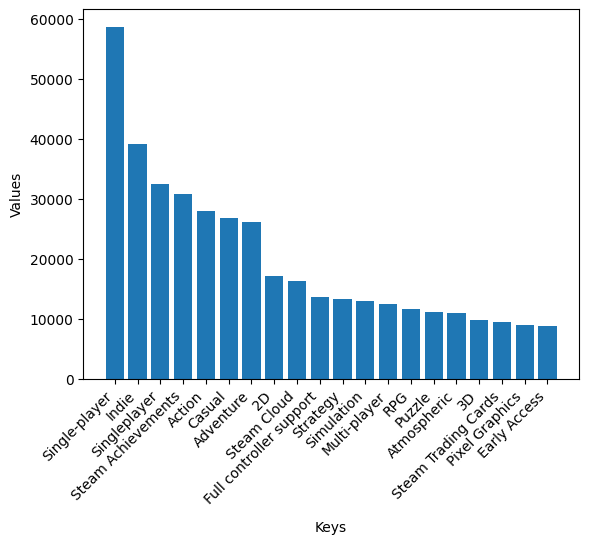

<Figure size 2000x600 with 0 Axes>

In [121]:
#category and tags top 20
plot_dict_bar2(cat_tags)

In [125]:
genre_count2

{'Casual': 24795,
 'Indie': 44496,
 'Sports': 2973,
 'Action': 26693,
 'Adventure': 24486,
 'Free to Play': 3421,
 'Massively Multiplayer': 1551,
 'RPG': 11024,
 'Strategy': 12396,
 'Simulation': 12293,
 'Early Access': 7419,
 'Racing': 2423}

In [128]:
type(genre_count2)

dict

In [130]:
#turn dictionary to a counter object to merge
count_dict2 = Counter(dict(genre_count2))

In [131]:
type(count_dict2)

collections.Counter

In [136]:
count_dict2.most_common()

[('Indie', 44496),
 ('Action', 26693),
 ('Casual', 24795),
 ('Adventure', 24486),
 ('Strategy', 12396),
 ('Simulation', 12293),
 ('RPG', 11024),
 ('Early Access', 7419),
 ('Free to Play', 3421),
 ('Sports', 2973),
 ('Racing', 2423),
 ('Massively Multiplayer', 1551)]

In [137]:
cat_tags.most_common()

[('Single-player', 58728),
 ('Indie', 39109),
 ('Singleplayer', 32468),
 ('Steam Achievements', 30780),
 ('Action', 27943),
 ('Casual', 26830),
 ('Adventure', 26197),
 ('2D', 17185),
 ('Steam Cloud', 16295),
 ('Full controller support', 13630),
 ('Strategy', 13364),
 ('Simulation', 13035),
 ('Multi-player', 12560),
 ('RPG', 11701),
 ('Puzzle', 11223),
 ('Atmospheric', 10967),
 ('3D', 9733),
 ('Steam Trading Cards', 9466),
 ('Pixel Graphics', 9008),
 ('Early Access', 8885),
 ('Story Rich', 8842),
 ('Colorful', 8713),
 ('Partial Controller Support', 8628),
 ('Cute', 7895),
 ('Exploration', 7740),
 ('Multiplayer', 7704),
 ('PvP', 7686),
 ('Arcade', 7609),
 ('First-Person', 7486),
 ('Fantasy', 7451),
 ('Funny', 6602),
 ('Shooter', 6489),
 ('Co-op', 6326),
 ('Retro', 6299),
 ('Steam Leaderboards', 5912),
 ('Online PvP', 5443),
 ('Remote Play Together', 5301),
 ('Shared/Split Screen', 4792),
 ('Online Co-op', 3437),
 ('Shared/Split Screen PvP', 3409),
 ('Stats', 3139),
 ('Shared/Split Screen

In [138]:
fin_add_col= list(set(cat_tags.most_common()+ count_dict2.most_common()))

In [144]:
fin_add_col =dict(fin_add_col)

In [147]:
fin_add_col = Counter(dict(fin_add_col))

In [150]:
len(fin_add_col.most_common())

54

AttributeError: 'Counter' object has no attribute 'key'

# end code to merge tags and cate

In [99]:
#plotting Categories with data sorting
def plot_dict_bar2(dictionary):

    #sort diction asceding
    sorted_dict = sorted(dictionary.items(), key=lambda x:x[1])
    converted_dict = dict(sorted_dict)

    count_dict = Counter(dict(sorted_dict))
    updated_dict = dict(count_dict.most_common(20))
    #
    keys = updated_dict.keys()
    values = updated_dict.values()

    plt.bar(keys, values)
    plt.xlabel('Keys', labelpad=10)
    plt.ylabel('Values')
    #adjust some layouts
    plt.xticks(rotation = 45, ha= 'right') #angles the columns labels for better readability
    plt.figure(figsize=(20,6))

    plt.show()

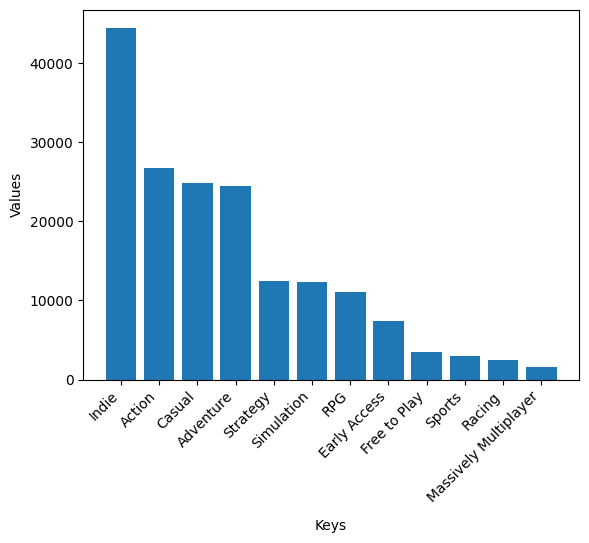

<Figure size 2000x600 with 0 Axes>

In [100]:
# Genres
plot_dict_bar2(genre_count2)

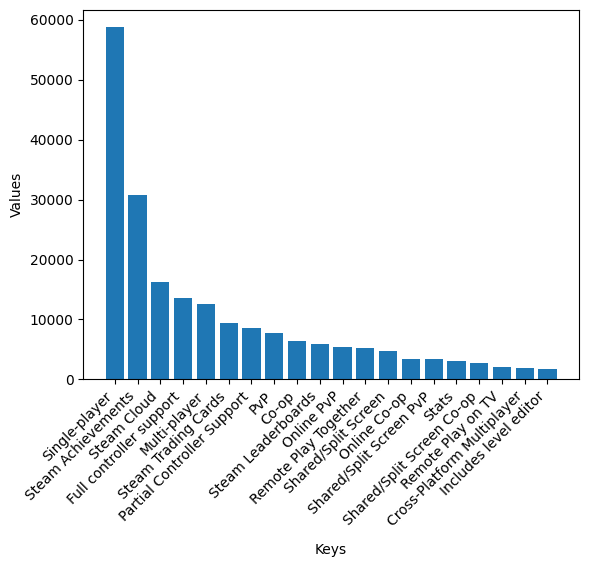

<Figure size 2000x600 with 0 Axes>

In [101]:
#categories
plot_dict_bar2(cate_count2)


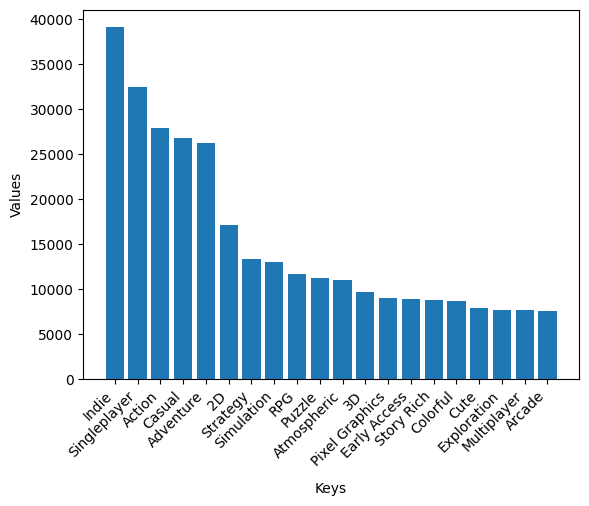

<Figure size 2000x600 with 0 Axes>

In [102]:
#Tags
plot_dict_bar2(tag_count2)

For categories, I'm going to just look at the following games that have:

* Single-Player
* Muli-player
* controller Support (Full or Partial)




# end experiment